#### machine learning practice ni tricia alcisto charut kuyawa gud
DATASET from UC Irvine ML repository: MAGIC Gamma Telescope
Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
cols = ["flength", "fwidth", "fsize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", 
       "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,flength,fwidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df["class"].unique()

array(['g', 'h'], dtype=object)

 g for gammas, h for hadrons. therefore supervised learning 

In [7]:
df["class"] = (df["class"]== "g").astype(int)
df.head()

,flength,fwidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


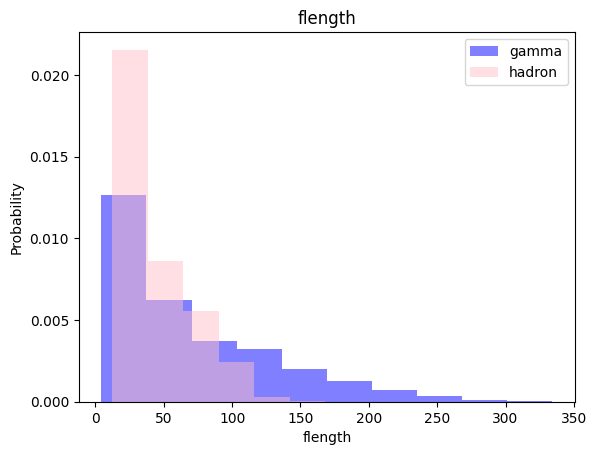

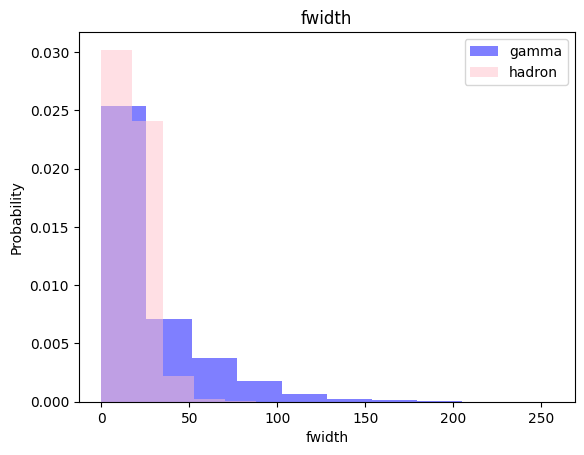

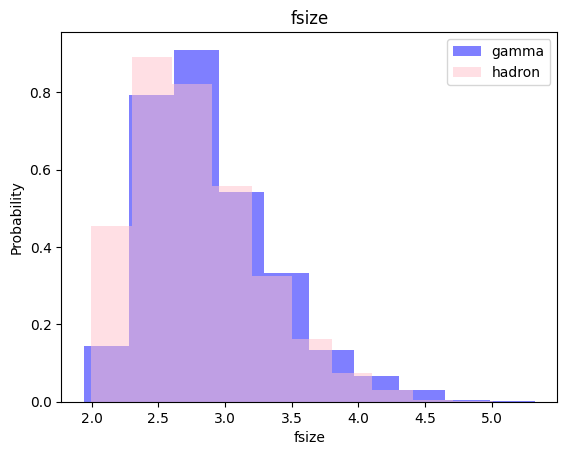

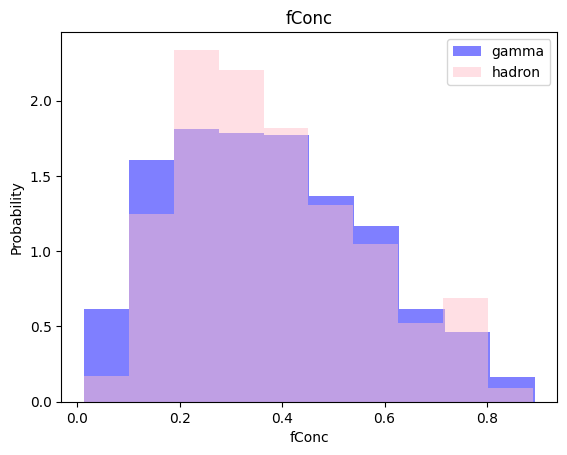

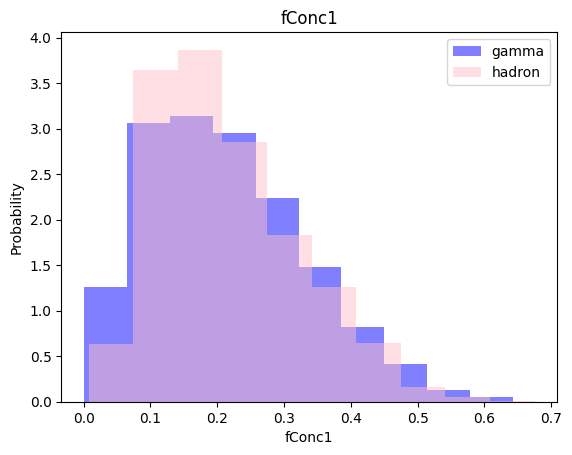

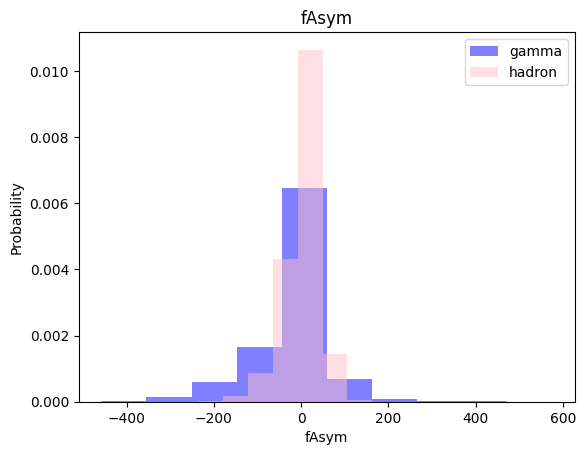

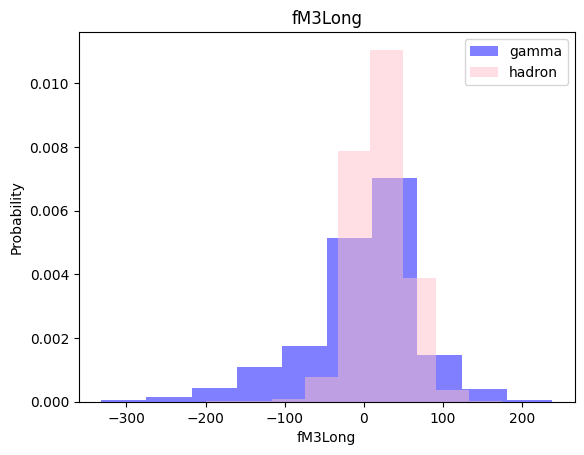

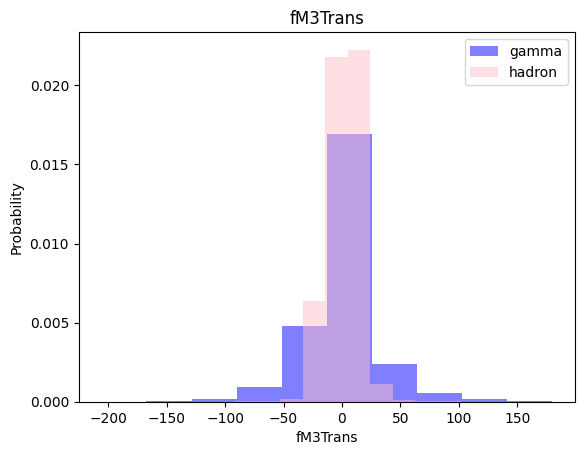

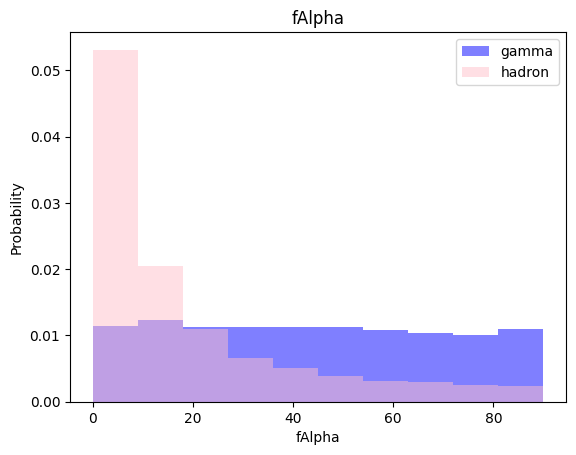

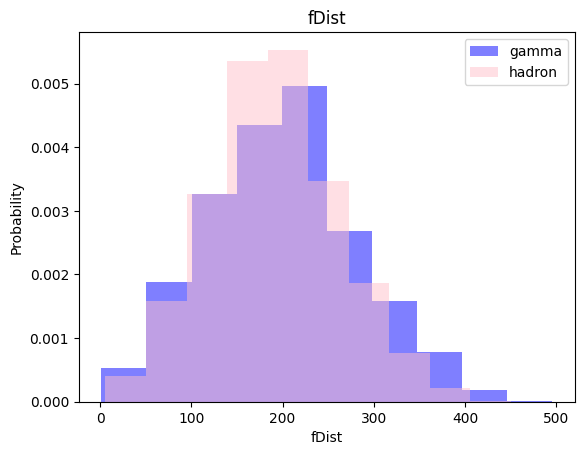

In [8]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==0][label], color='blue', label='gamma', alpha=0.5, density=True)
    plt.hist(df[df["class"]==1][label], color='pink', label='hadron', alpha=0.5, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

#### training, testing, validating

In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  

C:\Users\Bojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_ds(dataframe):
    x=dataframe[dataframe.cols[:-1]].values
    y= dataframe[dataframe.cols[-1]].values

    scaler = StandardScaler()
    x=scaler.fit_transform(x)

    data = np.hstack((x,np.reshape(y(-1, 1))))

    return data,x,y


### training dataset

In [12]:
train

,flength,fwidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18549,120.9082,108.9327,4.0089,0.1344,0.0621,14.7849,-42.1230,-89.6633,88.6873,337.6749,0
17242,23.0957,17.2973,2.5315,0.4002,0.2217,-37.4065,-11.6192,-12.7428,69.3006,156.1766,0
7704,27.4069,22.8564,3.0336,0.3498,0.2291,-5.1180,-14.9290,17.3300,76.0500,102.3300,1
1202,49.4822,16.2215,2.9398,0.2114,0.1097,30.5095,21.1074,7.9080,3.8218,208.7430,1
1661,25.8428,15.6143,2.4624,0.4862,0.2466,-13.5575,-12.5121,11.2755,8.0678,116.8050,1
...,...,...,...,...,...,...,...,...,...,...,...
13702,23.2865,14.6321,2.5515,0.4268,0.2495,1.5630,15.7269,3.7522,35.7297,193.4381,0
3720,20.7684,8.9999,2.3243,0.6398,0.3341,25.2421,7.7059,1.5777,74.3421,93.6780,1
2900,38.4181,17.1406,2.5971,0.4020,0.2162,16.0802,39.5951,-13.8313,0.3930,261.0140,1
2613,21.6691,12.4606,2.4289,0.5549,0.3259,24.4170,15.0588,9.1451,8.8910,133.3450,1
